In [13]:
import pandas as pd
import os

In [14]:
# Get the month priority from the filename to sort the files
def get_month(filename):
    month_mapping = {
        'January': 1,
        'February': 2,
        'March': 3,
        'April': 4,
        'May': 5,
        'June': 6,
        'July': 7,
        'August': 8,
        'September': 9,
        'October': 10,
        'November': 11,
        'December': 12
    }
    month_name = filename.split('_')[1]
    return month_mapping[month_name]

In [15]:
# Read the csv files from the Sales_Data folder
files = [file for file in os.listdir('SalesAnalysis/Sales_Data')]

# Sort the files based on the month name
sorted_files = sorted(files, key=get_month)

all_months_data = pd.DataFrame()

# Print the sorted files
for file in sorted_files:
    df = pd.read_csv('SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])
    

### Clean the data

In [16]:
all_months_data = all_months_data.dropna(how='all')

# if Quantity Ordered value is 0.0, then drop that row
all_months_data = all_months_data[all_months_data['Quantity Ordered'] != '0.0']

all_months_data = all_months_data.reset_index(drop=True)

### Save the data to a csv file

In [17]:
all_months_data.to_csv('SalesAnalysis/Output/all_data.csv', index=False)

### Set low memory to False

In [18]:
all_data = pd.read_csv('SalesAnalysis/Output/all_data.csv', low_memory=False)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19,"387 10th St, Austin, TX 73301"


In [19]:
# Check Order Date column has any value named Order Date
all_data[all_data['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1069,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1098,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1190,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1890,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2456,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184389,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184527,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184938,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185381,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Covert Quantity Ordered and Price Each to numeric

In [20]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

### Adding a month column

In [21]:
# month is 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12
# if order date is 1/25/19 13:05, then add 01
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,700.00,01/22/19,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2.0,11.99,01/17/19,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1.0,149.99,01/05/19,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1.0,11.99,01/25/19,"387 10th St, Austin, TX 73301",01


### add a sales column

In [22]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
# I want to see first 100 rows
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1.0,700.00,01/22/19,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1.0,14.95,01/28/19,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2.0,11.99,01/17/19,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1.0,149.99,01/05/19,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1.0,11.99,01/25/19,"387 10th St, Austin, TX 73301",01,11.99
...,...,...,...,...,...,...,...,...
186300,319666,Lightning Charging Cable,1.0,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95
186301,319667,AA Batteries (4-pack),2.0,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68
186302,319668,Vareebadd Phone,1.0,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00
186303,319669,Wired Headphones,1.0,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99


In [27]:
### Best month for sales
# if Month column contains 'Or', then drop that row
all_data = all_data[all_data['Month'] != 'Or']
all_data.groupby('Month').sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
Month,,,,,,,
01,1412341412351412361412371412381412391412401412...,iPhoneLightning Charging CableWired Headphones...,10903.0,1811768.38,01/22/1901/28/1901/17/1901/05/1901/25/1901/29/...,"944 Walnut St, Boston, MA 02215185 Maple St, P...",1822256.73
02,1452121453721464421473091476631489871505021505...,Lightning Charging CableAAA Batteries (4-pack)...,13449.0,2188884.72,02/01/1902/01/1902/01/1902/01/1902/01/1902/01/...,"484 6th St, Dallas, TX 75001459 West St, Dalla...",2202022.42
03,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005.0,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
04,1623581625411650071656221662501663091665671672...,Flatscreen TVAAA Batteries (4-pack)34in Ultraw...,20558.0,3367671.02,04/01/19 01:1104/01/19 01:1504/01/19 00:1204/0...,"444 12th St, New York City, NY 10001672 2nd St...",3390670.24
05,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667.0,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
06,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253.0,2562025.61,06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...",2577802.26
07,2116652117902126042136602136992140992140992149...,27in FHD MonitorAAA Batteries (4-pack)27in FHD...,16072.0,2632539.56,07/01/19 00:5407/01/19 02:0507/01/19 00:5007/0...,"300 9th St, San Francisco, CA 94016791 13th St...",2647775.76
08,2237102255412256582271152275212275212277322296...,Bose SoundSport Headphones27in 4K Gaming Monit...,13448.0,2230345.42,08/01/19 01:5608/01/19 01:1508/01/19 01:1408/0...,"882 Lake St, San Francisco, CA 94016480 Spruce...",2244467.88
09,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109.0,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


## Question 1: What was the best month for sales? How much was earned that month?

Text(0.5, 0, 'Month number')

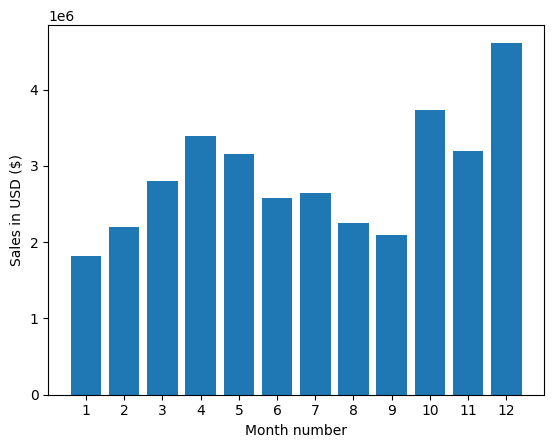

In [28]:
import matplotlib.pyplot as plt

months = range(1, 13)
results = all_data.groupby('Month').sum()
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')

## Question 2: What city had the highest number of sales?